In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
%matplotlib inline

from random import sample

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
data  = pd.read_csv("cars.csv")

In [4]:
data[["price","CarName","horsepower","curbweight","symboling"]]

,price,CarName,horsepower,curbweight,symboling
0,13495.000,alfa-romero giulia,111,2548,3
1,16500.000,alfa-romero stelvio,111,2548,3
2,16500.000,alfa-romero Quadrifoglio,154,2823,1
3,13950.000,audi 100 ls,102,2337,2
4,17450.000,audi 100ls,115,2824,2
5,15250.000,audi fox,110,2507,2
6,17710.000,audi 100ls,110,2844,1
7,18920.000,audi 5000,110,2954,1
8,23875.000,audi 4000,140,3086,1
9,17859.167,audi 5000s (diesel),160,3053,0


In [5]:
print(data)

     car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 3

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:

print("Liste doublons: "+ data[data.duplicated()])
data = data.drop_duplicates()

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []


In [8]:
vehicule  = data['CarName'].copy()
print("Nombre véhicules: "+str(len(vehicule)) + " Nombre type voiture: " +  str(len(vehicule.drop_duplicates())) )


Nombre véhicules: 205 Nombre type voiture: 147


In [9]:
vehicule = vehicule.drop_duplicates()
print(vehicule.head(100))

0                   alfa-romero giulia
1                  alfa-romero stelvio
2             alfa-romero Quadrifoglio
3                          audi 100 ls
4                           audi 100ls
5                             audi fox
7                            audi 5000
8                            audi 4000
9                  audi 5000s (diesel)
10                            bmw 320i
12                              bmw x1
13                              bmw x3
14                              bmw z4
15                              bmw x4
16                              bmw x5
18                    chevrolet impala
19               chevrolet monte carlo
20                 chevrolet vega 2300
21                       dodge rampage
22                 dodge challenger se
23                          dodge d200
24                   dodge monaco (sw)
25                  dodge colt hardtop
26                     dodge colt (sw)
27                dodge coronet custom
28                   dodg

In [10]:
prixMoyen = data[['price','CarName']].groupby('CarName').mean()
print(prixMoyen)

                                        price
CarName                                      
Nissan versa                      5499.000000
alfa-romero Quadrifoglio         16500.000000
alfa-romero giulia               13495.000000
alfa-romero stelvio              16500.000000
audi 100 ls                      13950.000000
audi 100ls                       17580.000000
audi 4000                        23875.000000
audi 5000                        18920.000000
audi 5000s (diesel)              17859.167000
audi fox                         15250.000000
bmw 320i                         16677.500000
bmw x1                           20970.000000
bmw x3                           28992.500000
bmw x4                           30760.000000
bmw x5                           41315.000000
bmw z4                           24565.000000
buick century                    28176.000000
buick century luxus (sw)         28248.000000
buick century special            40960.000000
buick electra 225 custom         2

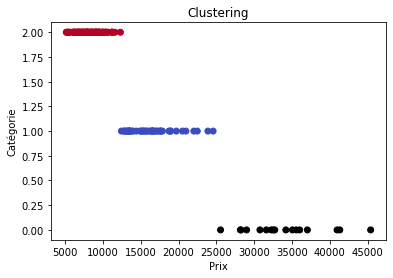

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

num_classes = 3


# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(prixMoyen)

# Predict the cluster for all the samples
P = kmeans.predict(prixMoyen)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else('#b40426' if x == 2 else '#000000'), P))
plt.scatter(prixMoyen, P, c=colors, marker="o", picker=True)
plt.title('Clustering')
plt.xlabel('Prix')
plt.ylabel('Catégorie')
plt.show()

In [12]:
prixMoyen['Categorie'] = P

In [13]:
categories = prixMoyen.groupby('Categorie').mean()
print(categories)

                  price
Categorie              
0          33900.808824
1          16483.800007
2           8244.111765


In [14]:
categories = categories.sort_values('price')
print(categories)

                  price
Categorie              
2           8244.111765
1          16483.800007
0          33900.808824


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['curbweight'].values.reshape(-1,1), data['price'].values.reshape(-1,1), test_size=0.2, random_state=0)

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [17]:
filename = 'RegressorSimple.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [18]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
#Le prix est en général 12.5 fois plus élevé que le curbweight/contenance

[-18833.60538279]
[[12.47623189]]


In [19]:
y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6795.0,4933.616376
1,15750.0,20479.001316
2,15250.0,12444.307976
3,5151.0,-268.972324
4,9995.0,9861.727974
5,11199.0,14590.219862
6,5389.0,5095.807390
7,7898.0,9736.965655
8,17199.0,19480.902764
9,6529.0,5370.284492


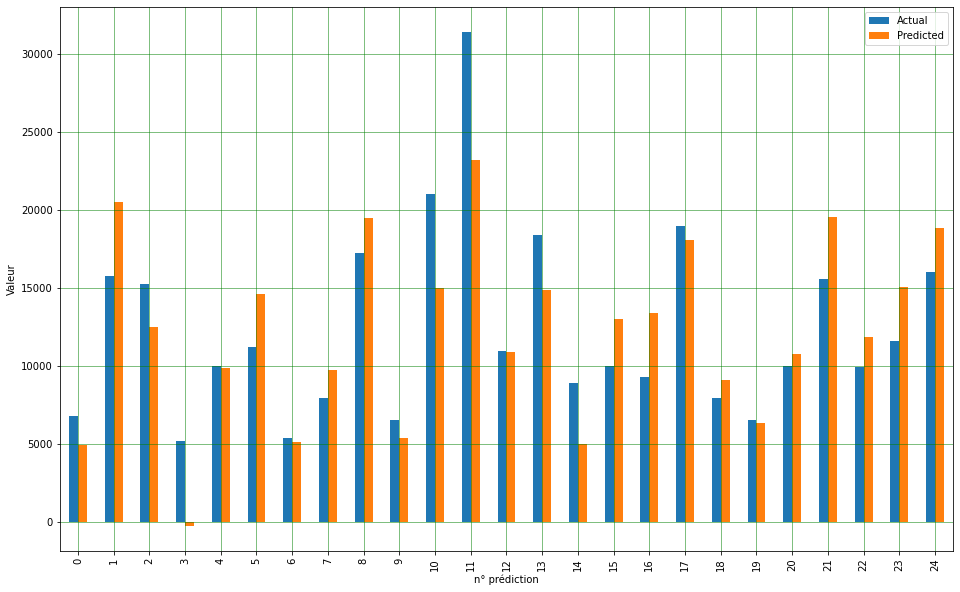

In [21]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('n° prédiction')
plt.ylabel('Valeur')
plt.show()

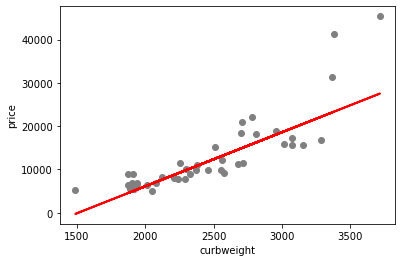

In [22]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('curbweight')
plt.ylabel('price')
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Average:',data['price'].mean())

Mean Absolute Error: 3256.3206615301897
Mean Squared Error: 25249391.104349032
Root Mean Squared Error: 5024.877222813412
Average: 13276.710570731706


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['curbweight','enginesize']], data['price'].values.reshape(-1,1), test_size=0.2, random_state=0)

In [25]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [26]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
#Le prix est en général 12.5 fois plus élevé que le curbweight/contenance

[-13904.08167959]
[[  5.25488446 107.39923972]]


In [27]:
print(data)

     car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 3

In [28]:
X_test
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6795.0,5879.804038
1,15750.0,19945.336860
2,15250.0,13876.210272
3,5151.0,466.540025
4,9995.0,9888.669716
5,11199.0,15854.042797
6,5389.0,6055.516776
7,7898.0,8010.333796
8,17199.0,21672.930897
9,6529.0,6171.124234


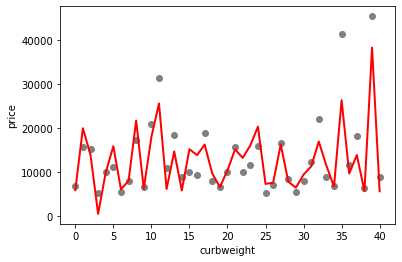

In [30]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(range(len(y_pred)), y_pred, color='red', linewidth=2)
plt.xlabel('curbweight')
plt.ylabel('price')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Average:',data['price'].mean())


Mean Absolute Error: 2844.0597791488526
Mean Squared Error: 15456489.240936035
Root Mean Squared Error: 3931.47418164434
R2: 0.8003459527691155
Average: 13276.710570731706


In [32]:
print(data.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [33]:
data1 = data

In [34]:
data['doornumber'].map({'two': 2, 'four': 4})
data['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

0       4
1       4
2       6
3       4
4       5
5       5
6       5
7       5
8       5
9       5
10      4
11      4
12      6
13      6
14      6
15      6
16      6
17      6
18      3
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
30      4
31      4
32      4
33      4
34      4
35      4
36      4
37      4
38      4
39      4
40      4
41      4
42      4
43      4
44      4
45      4
46      4
47      6
48      6
49     12
50      4
51      4
52      4
53      4
54      4
55      2
56      2
57      2
58      2
59      4
60      4
61      4
62      4
63      4
64      4
65      4
66      4
67      5
68      5
69      5
70      5
71      8
72      8
73      8
74      8
75      4
76      4
77      4
78      4
79      4
80      4
81      4
82      4
83      4
84      4
85      4
86      4
87      4
88      4
89      4
90      4
91      4
92      4
93      4
94      4
95      4
96      4
97      4
98      4
99      4


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

for i,column in data.iteritems():
    if column.dtype ==  object:
        encoder = OrdinalEncoder()
        encoder.fit(column.values.reshape(-1,1))
        data[column.name] = encoder.transform(column.values.reshape(-1,1))


In [ ]:
filename = 'OrdinalEncoder.sav'
pickle.dump(encoder, open(filename, 'wb'))

In [38]:
print(data)

[[  0.   5.   2. ...   8.  10. 118.]
 [  1.   5.   3. ...   8.  10. 137.]
 [  2.   3.   1. ...   6.   9. 137.]
 ...
 [202.   1. 140. ...   5.   6. 165.]
 [203.   1. 142. ...  13.  10. 167.]
 [204.   1. 143. ...   6.   8. 168.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='price'), data['price'].values.reshape(-1,1), test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
#Le prix est en général 12.5 fois plus élevé que le curbweight/contenance

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(range(len(y_pred)), y_pred, color='red', linewidth=2)
plt.xlabel('curbweight')
plt.ylabel('price')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Average:',data['price'].mean())

In [ ]:
#pour l'API modele de prédiction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[["CarName","horsepower","curbweight","symboling"]], data['price'].values.reshape(-1,1), test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(range(len(y_pred)), y_pred, color='red', linewidth=2)
plt.xlabel('curbweight')
plt.ylabel('price')
plt.show()

In [ ]:
filename = 'LinearRegressionModel.sav'
pickle.dump(regressor, open(filename, 'wb'))